# BFS Capstone CredX

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, We need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project. 

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 12)

import warnings
warnings.filterwarnings('ignore')

<b> Putting Demographic_data in demo dataframe and Credit Bureau data in credit dataframe.

In [2]:
demo = pd.read_csv("Demographic data.csv", sep=",")
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [3]:
credit = pd.read_csv("Credit Bureau data.csv", sep=",")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [4]:
credit.shape

(71295, 19)

# Exploratory Data Analysis
Now, we will do Exploratory Data Analysis on individual features and look for patterns.

### Lets start with demographic data (demo Dataframe)

In [5]:
#chceking for the shape of dataframe.
demo.shape

(71295, 12)

In [6]:
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [7]:
#Status of customer performance (" 1 represents "Default").
#chceking the defaults values
demo['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

<B>Age

In [8]:
#Checking foe the Age count for outliers
demo['Age'][demo['Age']<10].value_counts()

 0    19
-3     1
Name: Age, dtype: int64

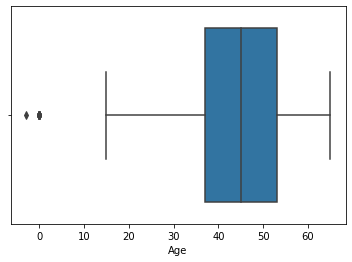

In [9]:
sns.boxplot(x='Age', data=demo)
plt.show()

In [10]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,demo['Age'].max() + 10, 10)
demo['age_bins'] = pd.cut(demo['Age'], bins, include_lowest=True)

In [11]:
No_of_prospect = demo.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')

In [12]:
count_prospects = demo[demo['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')

In [13]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [14]:
agg_age['default_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(4)

In [15]:
agg_age

,age_bins,No.of_prospect,count_prospects,default_rate
0,"(9.999, 20.0]",121,3,2.48
1,"(20.0, 30.0]",5807,238,4.10
2,"(30.0, 40.0]",18690,831,4.45
3,"(40.0, 50.0]",22872,958,4.19
4,"(50.0, 60.0]",17535,718,4.09
5,"(60.0, 70.0]",4825,200,4.15


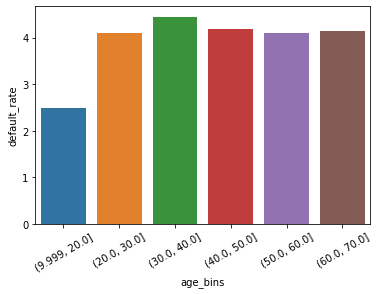

In [16]:
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Gender

In [17]:
demo['Gender'].value_counts()

M    54456
F    16837
Name: Gender, dtype: int64

In [18]:
No_of_prospect = demo.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_prospect')

In [19]:
count_prospects_gender = demo.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [20]:
agg_gender = No_of_prospect.merge(count_prospects_gender, on = 'Gender')

In [21]:
agg_gender['default_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No_of_prospect']).round(4)

In [22]:
agg_gender

,Gender,No_of_prospect,count_prospects,default_rate
0,F,16506,718.0,4.35
1,M,53362,2230.0,4.18


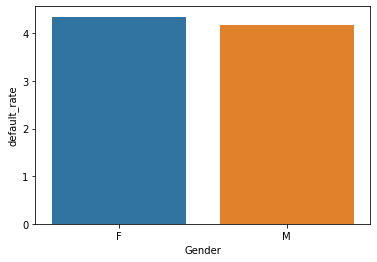

In [23]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### Marital Status

In [24]:
demo.rename({'Marital Status (at the time of application)': 'Marital_Status'}, axis=1, inplace=True)

In [25]:
demo['Marital_Status'].value_counts()

Married    60730
Single     10559
Name: Marital_Status, dtype: int64

In [26]:
No_of_prospect = demo.groupby('Marital_Status')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_marital = demo.groupby('Marital_Status')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_marital = No_of_prospect.merge(count_prospects_marital, on = 'Marital_Status')
agg_marital['default_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospect']).round(4)
agg_marital

,Marital_Status,No_of_prospect,count_prospects,default_rate
0,Married,59547,2503.0,4.20
1,Single,10317,445.0,4.31


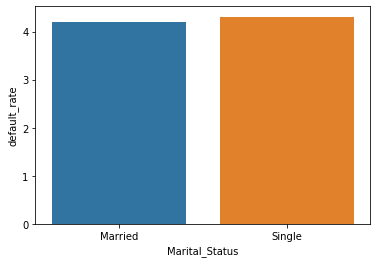

In [27]:
ax = sns.barplot(x='Marital_Status', y='default_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### No of dependents  

In [28]:
demo['No of dependents'].value_counts()  

3.0    16279
1.0    15387
2.0    15289
4.0    12222
5.0    12115
Name: No of dependents, dtype: int64

In [29]:
No_of_prospect = demo.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_dependents = demo.groupby('No of dependents')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_dependents = No_of_prospect.merge(count_prospects_dependents, on = 'No of dependents')
agg_dependents['default_rate'] = 100*(agg_dependents['count_prospects']/agg_dependents['No_of_prospect']).round(4)
agg_dependents

,No of dependents,No_of_prospect,count_prospects,default_rate
0,1.0,15218,667.0,4.38
1,2.0,15128,588.0,3.89
2,3.0,15645,695.0,4.44
3,4.0,12000,494.0,4.12
4,5.0,11876,504.0,4.24


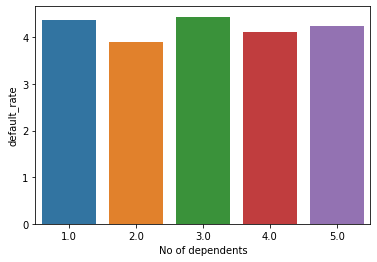

In [30]:
ax = sns.barplot(x='No of dependents', y='default_rate', data=agg_dependents)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### Income

In [31]:
demo['Income'][demo['Income']<1].value_counts()

-0.5    81
 0.0    26
Name: Income, dtype: int64

In [32]:
demo['Income'].value_counts().head()

4.5     5232
31.0    1450
33.0    1447
23.0    1443
26.0    1443
Name: Income, dtype: int64

In [33]:
bins = np.arange(10,demo['Income'].max() + 10, 10)
demo['Income_bins'] = pd.cut(demo['Income'], bins, include_lowest=True)

In [34]:
demo.head()

,Application ID,Age,Gender,Marital_Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,age_bins,Income_bins
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]"


In [35]:
No_of_prospect = demo.groupby('Income_bins')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_income = demo.groupby('Income_bins')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_income = No_of_prospect.merge(count_prospects_income, on = 'Income_bins')
agg_income['default_rate'] = 100*(agg_income['count_prospects']/agg_income['No_of_prospect']).round(4)
agg_income

,Income_bins,No_of_prospect,count_prospects,default_rate
0,"(9.999, 20.0]",14684,683.0,4.65
1,"(20.0, 30.0]",13587,601.0,4.42
2,"(30.0, 40.0]",13636,485.0,3.56
3,"(40.0, 50.0]",10844,384.0,3.54
4,"(50.0, 60.0]",5612,161.0,2.87


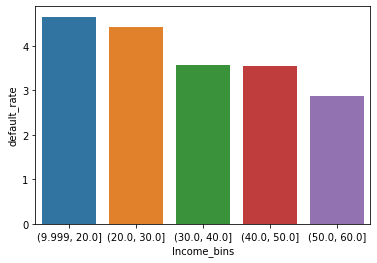

In [36]:
ax = sns.barplot(x='Income_bins', y='default_rate', data=agg_income)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [37]:
demo['Income_bins'].value_counts().head()

(9.999, 20.0]    15053
(30.0, 40.0]     13771
(20.0, 30.0]     13764
(40.0, 50.0]     10932
(50.0, 60.0]      5647
Name: Income_bins, dtype: int64

### Education                                      

In [38]:
demo['Education'].value_counts()  

Professional    24839
Masters         23970
Bachelor        17697
Phd              4549
Others            121
Name: Education, dtype: int64

In [39]:
No_of_prospect = demo.groupby('Education')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_edu = demo.groupby('Education')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_edu = No_of_prospect.merge(count_prospects_edu, on = 'Education')
agg_edu['Default_Rate'] = 100*(agg_edu['count_prospects']/agg_edu['No_of_prospect']).round(4)
agg_edu

,Education,No_of_prospect,count_prospects,Default_Rate
0,Bachelor,17302,742.0,4.29
1,Masters,23481,998.0,4.25
2,Others,119,8.0,6.72
3,Phd,4464,184.0,4.12
4,Professional,24386,1011.0,4.15


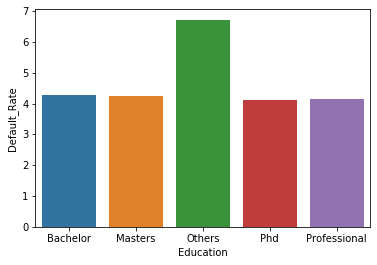

In [40]:
ax = sns.barplot(x='Education', y='Default_Rate', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### Profession                           

In [41]:
demo.columns

Index(['Application ID', 'Age', 'Gender', 'Marital_Status', 'No of dependents', 'Income', 'Education', 'Profession ', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag', 'age_bins', 'Income_bins'], dtype='object')

In [42]:
demo.rename({'Profession ': 'Profession'}, axis=1, inplace=True)

In [43]:
demo['Profession'].value_counts()  

SAL        40439
SE_PROF    16535
SE         14307
Name: Profession, dtype: int64

In [44]:
No_of_prospect = demo.groupby('Profession')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_Profession = demo.groupby('Profession')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_Profession = No_of_prospect.merge(count_prospects_Profession, on = 'Profession')
agg_Profession['Default_Rate'] = 100*(agg_Profession['count_prospects']/agg_Profession['No_of_prospect']).round(4)
agg_Profession

,Profession,No_of_prospect,count_prospects,Default_Rate
0,SAL,39674,1629.0,4.11
1,SE,13927,642.0,4.61
2,SE_PROF,16256,677.0,4.16


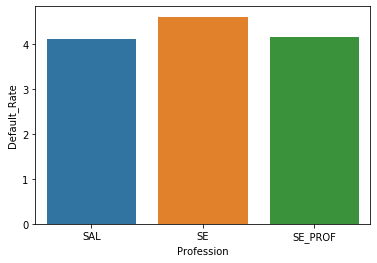

In [45]:
ax = sns.barplot(x='Profession', y='Default_Rate', data=agg_Profession)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### Type of residence

In [46]:
demo['Type of residence'].value_counts() 

Rented                 53397
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64

In [47]:
No_of_prospect = demo.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No_of_prospect')
count_prospects_Profession = demo.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'count_prospects')
agg_residence = No_of_prospect.merge(count_prospects_Profession, on = 'Type of residence')
agg_residence['Default_Rate'] = 100*(agg_residence['count_prospects']/agg_residence['No_of_prospect']).round(4)
agg_residence

,Type of residence,No_of_prospect,count_prospects,Default_Rate
0,Company provided,1603,73.0,4.55
1,Living with Parents,1778,80.0,4.50
2,Others,198,5.0,2.53
3,Owned,14003,593.0,4.23
4,Rented,52280,2197.0,4.20


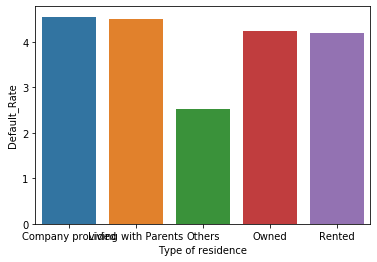

In [48]:
ax = sns.barplot(x='Type of residence', y='Default_Rate', data=agg_residence)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [49]:
demo['No of months in current residence'].value_counts() 

6      33966
14       454
8        424
18       423
12       422
10       412
11       408
7        403
29       403
9        402
15       398
33       393
13       392
22       390
40       388
17       386
21       381
16       379
39       378
20       373
35       372
31       372
38       371
45       369
19       368
25       367
27       366
34       364
42       360
30       359
23       358
28       347
50       346
53       345
43       344
41       343
52       340
51       340
48       339
26       339
37       335
47       335
58       333
32       331
24       329
59       329
56       329
107      328
66       324
49       323
36       322
114      321
54       320
67       313
46       312
103      312
116      311
44       311
70       306
61       305
91       304
112      303
94       303
109      302
72       300
60       299
78       299
76       299
101      299
57       298
95       298
88       297
73       295
65       295
84       294
81       294
79       293

In [50]:
demo['No of months in current company'].value_counts() 

3      4957
27     1098
38     1087
44     1081
5      1070
54     1069
40     1069
57     1069
53     1069
43     1062
12     1062
48     1057
24     1056
51     1053
41     1052
55     1051
45     1047
29     1045
13     1041
52     1041
7      1039
46     1038
58     1038
31     1037
19     1036
36     1035
56     1034
39     1034
42     1033
6      1032
16     1031
22     1025
26     1024
10     1024
34     1023
50     1023
9      1021
37     1020
33     1020
17     1017
30     1011
8      1007
15     1001
23     1000
32      998
35      998
18      994
28      993
25      992
14      990
4       988
20      987
49      976
21      973
47      973
11      942
62      900
60      895
59      885
61      841
71      510
65      510
63      501
64      500
67      494
70      485
69      477
72      474
66      474
68      467
73      461
75      459
74      409
83        1
91        1
126       1
96        1
133       1
98        1
105       1
121       1
123       1
128       1
Name

In [51]:
demo.isnull().sum()

Application ID                           0
Age                                      0
Gender                                   2
Marital_Status                           6
No of dependents                         3
Income                                   0
Education                              119
Profession                              14
Type of residence                        8
No of months in current residence        0
No of months in current company          0
Performance Tag                       1425
age_bins                                20
Income_bins                          12128
dtype: int64

In [52]:
# Droping the column age_bins and Income_bins as we had created for the purpose of data visualisation

demo.drop(columns = 'age_bins', inplace = True)
demo.drop(columns = 'Income_bins', inplace = True)

In [53]:
#percentage of nan values column wise-
demo.isnull().sum()*100/len(demo)

Application ID                       0.000000000000
Age                                  0.000000000000
Gender                               0.002805245810
Marital_Status                       0.008415737429
No of dependents                     0.004207868714
Income                               0.000000000000
Education                            0.166912125675
Profession                           0.019636720668
Type of residence                    0.011220983239
No of months in current residence    0.000000000000
No of months in current company      0.000000000000
Performance Tag                      1.998737639386
dtype: float64

In [54]:
#removing nan as it will have less impact in calculatons
demo = demo.dropna(how='any',axis=0)

## Calucalation of WoE and IV on the demographic data.

In [55]:
demo['No of dependents']=demo['No of dependents'].astype(int)
demo['Income']=demo['Income'].astype(int)
demo['Performance Tag']=demo['Performance Tag'].astype(int)

In [56]:
demo.rename({'Performance Tag': 'target'}, axis=1, inplace=True)

In [57]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import warnings
warnings.filterwarnings('ignore')

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [58]:
final_iv, IV = data_vars(demo,demo.target)

In [59]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Application ID,100450,498073848,34861,1476,0.042339577178,33385,0.957660422822,0.501529051988,0.499940100033,0.003173244598,0.000010099104
1,Application ID,498076950,1000084142,34860,1467,0.042082616179,33393,0.957917383821,0.498470948012,0.500059899967,-0.003182582289,0.000010099104
2,Age,-3,40,24567,1070,0.043554361542,23497,0.956445638458,0.363574583758,0.351867381473,0.032730110776,0.000665474255
3,Age,41,50,22823,956,0.041887569557,21867,0.958112430443,0.324838600068,0.327458144898,-0.008031801270,0.000665474255
4,Age,51,65,22331,917,0.041063991760,21414,0.958936008240,0.311586816174,0.320674473629,-0.028748504733,0.000665474255
5,Gender,F,F,16479,717,0.043509921719,15762,0.956490078281,0.243628950051,0.236035820180,0.031662797415,0.000316266295
6,Gender,M,M,53242,2226,0.041809098080,51016,0.958190901920,0.756371049949,0.763964179820,-0.009988840430,0.000316266295
7,Marital_Status,Married,Married,59426,2498,0.042035472689,56928,0.957964527311,0.848793747876,0.852496331127,-0.004352684051,0.000107909744
8,Marital_Status,Single,Single,10295,445,0.043224866440,9850,0.956775133560,0.151206252124,0.147503668873,0.024791763729,0.000107909744
9,No of dependents,1,3,45892,1947,0.042425695110,43945,0.957574304890,0.661569826707,0.658076013058,0.005295090103,0.000054383843


In [60]:
IV.sort_values('IV')

,VAR_NAME,IV
1,Application ID,0.000010099104
6,No of dependents,0.000054383843
5,Marital_Status,0.000107909744
3,Gender,0.000316266295
0,Age,0.000665474255
2,Education,0.000783318992
10,Type of residence,0.000874583885
9,Profession,0.002353741201
7,No of months in current company,0.012736297666
4,Income,0.037297012936


## Apply WOE values to demo dataframe columns

In [61]:
demo.columns.difference(['target'])

Index(['Age', 'Application ID', 'Education', 'Gender', 'Income', 'Marital_Status', 'No of dependents', 'No of months in current company', 'No of months in current residence', 'Profession', 'Type of residence'], dtype='object')

In [62]:
transform_vars_list =demo.columns.difference(['target'])
transform_prefix = 'new_'

In [63]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd))
        except:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd1))

In [64]:
demo['No of dependents'].value_counts()  

3    15608
1    15181
2    15103
4    11976
5    11853
Name: No of dependents, dtype: int64

In [65]:
demo['new_No of dependents'].value_counts()

 0.005295090103    45892
-0.010270663622    23829
Name: new_No of dependents, dtype: int64

In [66]:
demo['new_No of months in current residence'].value_counts() 

-0.252821192812    35022
 0.206873768967    34699
Name: new_No of months in current residence, dtype: int64

In [67]:
small_df = final_iv[final_iv['VAR_NAME'] == 'No of dependents']

In [68]:
small_df

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
9,No of dependents,1,3,45892,1947,0.042425695110,43945,0.957574304890,0.661569826707,0.658076013058,0.005295090103,0.000054383843
10,No of dependents,4,5,23829,996,0.041797809392,22833,0.958202190608,0.338430173293,0.341923986942,-0.010270663622,0.000054383843


##  Creating Master file using demographic and Credit bureau data

Joining demo1 and credit dataframe for performing EDA on master data

In [69]:
demo1 = pd.read_csv("Demographic data.csv", sep=",")

In [70]:
demo1.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [71]:
credit.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [72]:
master_file = demo1.merge(credit,on='Application ID')

In [73]:
master_file.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [74]:
master_file['Performance Tag_x'].value_counts()

0.0    66927
1.0     2949
Name: Performance Tag_x, dtype: int64

In [75]:
master_file['Performance Tag_y'].value_counts()

0.0    66927
1.0     2949
Name: Performance Tag_y, dtype: int64

In [76]:
master_file.shape

(71301, 30)

In [77]:
# Removnig duplicate Application ID from the Master_file
master_file = master_file.loc[master_file['Application ID'] != (653287861)]
master_file = master_file.loc[master_file['Application ID'] != (765011468)]
master_file = master_file.loc[master_file['Application ID'] != (671989187)]

In [78]:
master_file.shape

(71289, 30)

In [79]:
#percentage of nan values column wise-
master_file.isnull().sum()*100/len(demo)

Application ID                                                     0.000000000000
Age                                                                0.000000000000
Gender                                                             0.002868576182
Marital Status (at the time of application)                        0.008605728547
No of dependents                                                   0.004302864273
Income                                                             0.000000000000
Education                                                          0.170680282842
Profession                                                         0.020080033275
Type of residence                                                  0.011474304729
No of months in current residence                                  0.000000000000
No of months in current company                                    0.000000000000
Performance Tag_x                                                  2.043860529826
No of times 90 D

In [80]:
#dropping null values, Percentage mof null values are less so removing it.
master_file = master_file.dropna(how='any',axis=0)

In [81]:
master_file.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag_x                                                  0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

In [82]:
master_file['Performance Tag_y'].value_counts()

0.0    65799
1.0     2894
Name: Performance Tag_y, dtype: int64

In [83]:
master_file['Performance Tag_x'].value_counts()

0.0    65799
1.0     2894
Name: Performance Tag_x, dtype: int64

In [84]:
master_file.rename({'Performance Tag_y': 'target'}, axis=1, inplace=True)

In [85]:
master_file['target'].value_counts()

0.0    65799
1.0     2894
Name: target, dtype: int64

In [86]:
master_file.shape

(68693, 30)

In [87]:
del master_file['Performance Tag_x']

In [88]:
master_file.dtypes

Application ID                                                       int64
Age                                                                  int64
Gender                                                              object
Marital Status (at the time of application)                         object
No of dependents                                                   float64
Income                                                             float64
Education                                                           object
Profession                                                          object
Type of residence                                                   object
No of months in current residence                                    int64
No of months in current company                                      int64
No of times 90 DPD or worse in last 6 months                         int64
No of times 60 DPD or worse in last 6 months                         int64
No of times 30 DPD or wor

In [89]:
master_file['No of dependents']=master_file['No of dependents'].astype(int)
master_file['Income']=master_file['Income'].astype(int)
master_file['Avgas CC Utilization in last 12 months']=master_file['Avgas CC Utilization in last 12 months'].astype(int)
master_file['No of trades opened in last 6 months']=master_file['No of trades opened in last 6 months'].astype(int)
master_file['Presence of open home loan']=master_file['Presence of open home loan'].astype(int)
master_file['Outstanding Balance']=master_file['Outstanding Balance'].astype(int)
master_file['target']=master_file['target'].astype(int)

In [90]:
master_file.rename({'Profession ': 'Profession'}, axis=1, inplace=True)

In [91]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import warnings
warnings.filterwarnings('ignore')

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [92]:
final_iv, IV = data_vars(master_file,master_file.target)

In [222]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Application ID,100450,497958676,34347,1447.0,0.042128861327,32900.0,0.957871138673,0.500000000000,0.500007598900,-0.000015197684,0.000000000231
1,Application ID,498001549,1000084142,34346,1447.0,0.042130087929,32899.0,0.957869912071,0.500000000000,0.499992401100,0.000015197915,0.000000000231
2,Age,-3,40,24182,1055.0,0.043627491523,23127.0,0.956372508477,0.364547339323,0.351479505768,0.036505013221,0.000781389594
3,Age,41,50,22490,936.0,0.041618497110,21554.0,0.958381502890,0.323427781617,0.327573367376,-0.012736204241,0.000781389594
4,Age,51,65,22021,903.0,0.041006312157,21118.0,0.958993687843,0.312024879060,0.320947126856,-0.028193470511,0.000781389594


In [93]:
IV.sort_values('IV')

,VAR_NAME,IV
1,Application ID,0.000000000231
11,No of dependents,0.000077641468
6,Marital Status (at the time of application),0.000099878726
4,Gender,0.000261017498
0,Age,0.000781389594
3,Education,0.000832848994
27,Type of residence,0.000865437100
23,Presence of open auto loan,0.001589716972
25,Profession,0.002073528659
22,Outstanding Balance,0.007021285035


# Apply WOE values to master_file 

In [94]:
master_file.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,target
0,954457215,48,F,Married,2,40,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4,1,2,0,0,0,0,1,2999395,4,0,0
1,432830445,31,M,Married,4,55,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3,1,2,0,0,0,0,0,3078,5,0,0
2,941387308,32,M,Single,2,46,Bachelor,SE_PROF,Rented,104,49,0,0,0,0,0,0,7,0,0,0,0,0,0,1,3004972,2,0,0
3,392161677,43,M,Married,1,53,Bachelor,SE,Rented,94,53,0,0,0,0,0,0,11,1,1,0,0,0,0,1,3355373,4,1,0
4,182011211,35,F,Married,5,44,Professional,SAL,Rented,112,43,0,0,0,0,0,0,12,0,1,0,0,0,0,1,3014283,4,0,0


In [227]:
transform_vars_list =master_file.columns.difference(['target','Application ID'])
transform_prefix = 'new_'

In [228]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            master_file[transform_prefix + var] = master_file[var].apply(lambda x: eval(replace_cmd))
        except:
            master_file[transform_prefix + var] = master_file[var].apply(lambda x: eval(replace_cmd1))

In [229]:
master_file.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,target,new_Age,new_Application ID,new_Avgas CC Utilization in last 12 months,new_Education,new_Gender,new_Income,new_Marital Status (at the time of application),new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of dependents,new_No of months in current company,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Outstanding Balance,new_Presence of open auto loan,new_Presence of open home loan,new_Profession,new_Total No of Trades,new_Type of residence
0,954457215,48,F,Married,2,40,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4,1,2,0,0,0,0,1,2999395,4,0,0,-0.012736204241,0.000015197915,-0.795694466813,0.021131935128,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973
1,432830445,31,M,Married,4,55,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3,1,2,0,0,0,0,0,3078,5,0,0,0.036505013221,-0.000015197684,-0.795694466813,-0.014747857046,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.015325516468,-0.437024533063,-0.002592448973
2,941387308,32,M,Single,2,46,Bachelor,SE_PROF,Rented,104,49,0,0,0,0,0,0,7,0,0,0,0,0,0,1,3004972,2,0,0,0.036505013221,0.000015197915,-0.795694466813,0.021131935128,-0.009065511875,-0.263583470790,0.023831587379,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.015325516468,-0.437024533063,-0.002592448973
3,392161677,43,M,Married,1,53,Bachelor,SE,Rented,94,53,0,0,0,0,0,0,11,1,1,0,0,0,0,1,3355373,4,1,0,-0.012736204241,-0.000015197684,-0.573542220507,0.021131935128,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,-0.134307133627,-0

In [100]:
small_df1 = final_iv[final_iv['VAR_NAME'] == 'No of dependents']

In [101]:
small_df1

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
9,No of dependents,1,3,45228,1917.0,0.042385248076,43311.0,0.957614751924,0.662404975812,0.658231888023,0.006319832186,0.000077641468
10,No of dependents,4,5,23465,977.0,0.041636479864,22488.0,0.958363520136,0.337595024188,0.341768111977,-0.012285448105,0.000077641468


In [102]:
master_file.iloc[:2:].head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,target,new_Age,new_Application ID,new_Avgas CC Utilization in last 12 months,new_Education,new_Gender,new_Income,new_Marital Status (at the time of application),new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of dependents,new_No of months in current company,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Outstanding Balance,new_Presence of open auto loan,new_Presence of open home loan,new_Profession,new_Total No of Trades,new_Type of residence
0,954457215,48,F,Married,2,40,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4,1,2,0,0,0,0,1,2999395,4,0,0,-0.012736204241,0.000015197915,-0.795694466813,0.021131935128,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973
1,432830445,31,M,Married,4,55,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3,1,2,0,0,0,0,0,3078,5,0,0,0.036505013221,-0.000015197684,-0.795694466813,-0.014747857046,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.015325516468,-0.437024533063,-0.002592448973


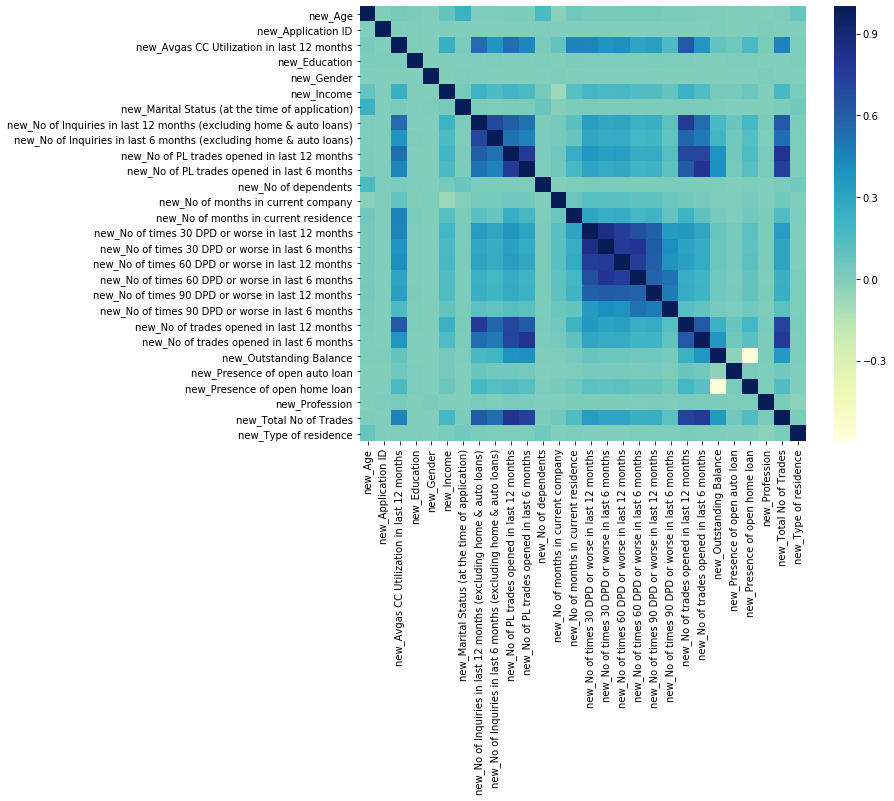

In [104]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(master_file.loc[:, 'new_Age':'new_Type of residence'].corr(), cmap="YlGnBu")
plt.show()

In [105]:
IV.sort_values('IV')

,VAR_NAME,IV
1,Application ID,0.000000000231
11,No of dependents,0.000077641468
6,Marital Status (at the time of application),0.000099878726
4,Gender,0.000261017498
0,Age,0.000781389594
3,Education,0.000832848994
27,Type of residence,0.000865437100
23,Presence of open auto loan,0.001589716972
25,Profession,0.002073528659
22,Outstanding Balance,0.007021285035


In [234]:
master_file1=master_file.loc[:, 'new_Age':'new_Type of residence']

In [232]:
master_file1.head()

,new_Age,new_Application ID,new_Avgas CC Utilization in last 12 months,new_Education,new_Gender,new_Income,new_Marital Status (at the time of application),new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of dependents,new_No of months in current company,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Outstanding Balance,new_Presence of open auto loan,new_Presence of open home loan,new_Profession,new_Total No of Trades,new_Type of residence
0,-0.012736204241,0.000015197915,-0.795694466813,0.021131935128,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973
1,0.036505013221,-0.000015197684,-0.795694466813,-0.014747857046,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.015325516468,-0.437024533063,-0.002592448973
2,0.036505013221,0.000015197915,-0.795694466813,0.021131935128,-0.009065511875,-0.263583470790,0.023831587379,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.015325516468,-0.437024533063,-0.002592448973
3,-0.012736204241,-0.000015197684,-0.573542220507,0.021131935128,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,-0.134307133627,-0.236410374704,0.088506886309,-0.437024533063,-0.002592448973
4,0.036505013221,-0.000015197684,-0.573542220507,-0.014747857046,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973


In [110]:
master_file['new_Profession'].value_counts()

-0.026443602598    39026
-0.015325516468    15970
 0.088506886309    13697
Name: new_Profession, dtype: int64

In [233]:
master_file1['target'] = master_file['target']
master_file1['Applocation_id'] = master_file['Application ID']


In [235]:
master_file1['target'] = master_file['target']
master_file1['Application_id'] = master_file['Application ID']

In [236]:
master_file1.columns

Index(['new_Age', 'new_Application ID', 'new_Avgas CC Utilization in last 12 months', 'new_Education', 'new_Gender', 'new_Income', 'new_Marital Status (at the time of application)', 'new_No of Inquiries in last 12 months (excluding home & auto loans)', 'new_No of Inquiries in last 6 months (excluding home & auto loans)', 'new_No of PL trades opened in last 12 months', 'new_No of PL trades opened in last 6 months', 'new_No of dependents', 'new_No of months in current company', 'new_No of months in current residence', 'new_No of times 30 DPD or worse in last 12 months', 'new_No of times 30 DPD or worse in last 6 months', 'new_No of times 60 DPD or worse in last 12 months', 'new_No of times 60 DPD or worse in last 6 months', 'new_No of times 90 DPD or worse in last 12 months', 'new_No of times 90 DPD or worse in last 6 months', 'new_No of trades opened in last 12 months', 'new_No of trades opened in last 6 months', 'new_Outstanding Balance', 'new_Presence of open auto loan',
       'new_P

## Train and Test data Split

In [114]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [238]:
# Putting feature variable to X
X = master_file1.drop(['target','Application_id'],axis=1)

# Putting response variable to y
y = master_file1['target']

In [239]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [240]:
X_train.head()

,new_Age,new_Application ID,new_Avgas CC Utilization in last 12 months,new_Education,new_Gender,new_Income,new_Marital Status (at the time of application),new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of dependents,new_No of months in current company,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Outstanding Balance,new_Presence of open auto loan,new_Presence of open home loan,new_Profession,new_Total No of Trades,new_Type of residence
56520,-0.012736204241,0.000015197915,0.368527149068,-0.014747857046,-0.009065511875,-0.263583470790,-0.004191057683,0.184847183055,-0.327689061569,0.394681390965,0.399777166044,0.006319832186,-0.123473350579,0.207685796672,0.710006774513,0.741355038830,0.693866599145,0.742751356115,-0.13517002683,-0.036697613882,0.366306281531,0.352757766085,0.080661975530,0.011837997719,0.073096902059,-0.015325516468,0.344747962084,-0.002592448973
14705,-0.028193470511,0.000015197915,-0.795694466813,-0.000351890402,-0.009065511875,0.048708748262,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,-0.255139897565,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.026443602598,-0.437024533063,-0.002592448973
27251,-0.012736204241,-0.000015197684,-0.573542220507,-0.014747857046,-0.009065511875,-0.239629394445,-0.004191057683,0.184847183055,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.076374544923,-0.255139897565,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,0.230369586253,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.026443602598,0.344747962084,-0.002592448973
65898,-0.012736204241,0.000015197915,0.368527149068,-0.000351890402,-0.009065511875,-0.239629394445,-0.004191057683,0.366076978134,0.291356202405,0.394681390965,-0.321729386953,0.006319832186,0.169159604675,-0.255139897565,0.710006774513,0.741355038830,0.693866599145,0.742751356115,-0.13517002683,-0.036697613882,0.230369586253,-0.275516612441,0.080661975530,-0.134307133627,-0.236410374704,-0.026443602598,0.344747962084,0.068768690853
11870,-0.028193470511,0.000015197915,-0.795694466813,0.021131935128,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,-0.255139897565,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.026443602598,-0.437024533063,-0.002592448973


### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at three different models

- Logistic Regression
- Decision Tree
- Random Forests

In [241]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [242]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
import statsmodels.api as sm

In [244]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                48085
Model:                            GLM   Df Residuals:                    48056
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7926.6
Date:                Sun, 15 Sep 2019   Deviance:                       15853.
Time:                        13:24:18   Pearson chi2:                 4.76e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -3.1396      0.024   -129.899      0.000      -3.187      -3.092
new_Age                                                                 0.3426      0.863      0.397      0.691      -1.348       2.034
new_Application ID                                                    561.5576   1516.955      0.370      0.711   -2411.620    3534.736
new_Avgas CC Utilization in last 12 months                              0.5591      0.064      8.731      0.000       0.434       0.685
new_Education                                                           1.4568      0.698      2.088      0.037       0.090       2.824
new_Gender                                                              1.8871      1.408      1.340      0.180      -0.873       4.647
new_Income                                                              0.2297      0.126      1.829      0.067      -0.016       0.476
new_Marital Status (at the time of application)                        -0.8465      2.371     -0.357      0.721      -5.494       3.801
new_No of Inquiries in last 12 months (excluding home & auto loans)     0.3622      0.085      4.265      0.000       0.196       0.529
new_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2365      0.096     -2.470      0.013      -0.424      -0.049
new_No of PL trades opened in last 12 months                            0.1530      0.098      1.559      0.119      -0.039       0.345
new_No of PL trades opened in last 6 months                             0.1524      0.111      1.374      0.169      -0.065       0.370
new_No of dependents                                                   -1.8490      2.664     -0.694      0.488      -7.070       3.372
new_No of months in current company                                     0.5245      0.204      2.575      0.010       0.125       0.924
new_No of months in current residence                                  -0.2210      0.118     -1.880      0.060      -0.451       0.009
new_No of times 30 DPD or worse in last 12 months                       0.2864      0.095      3.016      0.003       0.100       0.473
new_No of times 30 DPD or worse in last 6 months                        0.1466      0.118      1.244      0.214      -0.084       0.378
new_No of times 60 DPD or worse in last 12 months                       0.0156      0.100      0.156      0.876      -0.180       0.211
new_No of times 60 DPD or worse in last 6 months                       -0.1979      0.124     -1.599      0.110      -0.441       0.045
new_No of times 90 DPD or worse in last 12 months                       0.1442      0.091  

In [245]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [246]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support #!pip install imblearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [247]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [248]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      52.89
1      66.92
2      74.76
3      80.89
4      84.01
5      85.90
6      87.67
7      89.31
8      90.92
9      92.41
10     93.86
11     95.19
12     96.26
13     97.18
14     97.97
15     98.61
16     99.14
17     99.62
18     99.71
19     99.80
20     99.87
21     99.92
22     99.95
23     99.98
24     99.99
25    100.00
26    100.00
27    100.00
dtype: float64


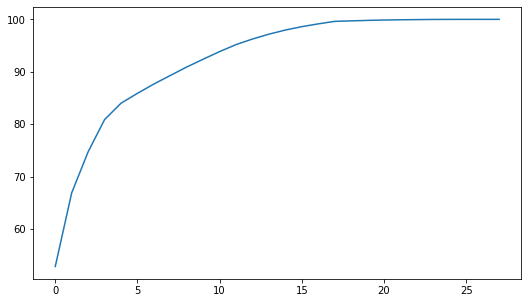

In [249]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [250]:
# create pipeline
PCA_VARS = 10
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [251]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.5628366434439014

In [253]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[10894  8816]
 [  258   640]]
Sensitivity: 	0.71
Specificity: 	0.55
AUC:    	 0.68


In [254]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.958490173651
1    0.041509826349
Name: target, dtype: float64

In [255]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [8,9,10,11,12], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [256]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [257]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6707819103323178
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 11}


In [258]:
# predict default on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[10884  8826]
 [  262   636]]
Sensitivity: 	0.71
Specificity: 	0.55
AUC:    	 0.68


In [259]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71     19710
           1       0.07      0.71      0.12       898

    accuracy                           0.56     20608
   macro avg       0.52      0.63      0.41     20608
weighted avg       0.94      0.56      0.68     20608



We have created below models
- Logistic Regression
- Decision Tree
- Random Forests
and comapare the confusion matrix, Based on anlaysis 
<B>We are going ahead with logistic Regression.


<B >Model building using Decision Tree and Random Forest covered covered below.

# Scorecard

In [266]:
master_file1.head()

,new_Age,new_Application ID,new_Avgas CC Utilization in last 12 months,new_Education,new_Gender,new_Income,new_Marital Status (at the time of application),new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of dependents,new_No of months in current company,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Outstanding Balance,new_Presence of open auto loan,new_Presence of open home loan,new_Profession,new_Total No of Trades,new_Type of residence,target,Application_id
0,-0.012736204241,0.000015197915,-0.795694466813,0.021131935128,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973,0,954457215
1,0.036505013221,-0.000015197684,-0.795694466813,-0.014747857046,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,-0.087096740599,0.011837997719,0.073096902059,-0.015325516468,-0.437024533063,-0.002592448973,0,432830445
2,0.036505013221,0.000015197915,-0.795694466813,0.021131935128,-0.009065511875,-0.263583470790,0.023831587379,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.015325516468,-0.437024533063,-0.002592448973,0,941387308
3,-0.012736204241,-0.000015197684,-0.573542220507,0.021131935128,-0.009065511875,-0.263583470790,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,0.006319832186,-0.123473350579,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,-0.134307133627,-0.236410374704,0.088506886309,-0.437024533063,-0.002592448973,0,392161677
4,0.036505013221,-0.000015197684,-0.573542220507,-0.014747857046,0.028792988106,-0.239629394445,-0.004191057683,-0.877101269518,-0.327689061569,-0.465513628145,-0.321729386953,-0.012285448105,-0.076374544923,0.207685796672,-0.273421986938,-0.200861995559,-0.203625775873,-0.122695579283,-0.13517002683,-0.036697613882,-0.917847097865,-0.275516612441,0.080661975530,0.011837997719,-0.236410374704,-0.026443602598,-0.437024533063,-0.002592448973,0,182011211


In [1]:
#computing odds for good. Since the probability computed is for rejection (bad cusotmers),  Odd(good) =  (1-P(bad))/P(bad)
Odds_for_good = y_pred.apply(x, lambda (1-x)/x)

In [272]:
#computing  ln(odd(good))
ln_Odds_for_good = Odds_for_good.apply(x,lambda log(x))

In [ ]:
#Using the following formula for computing application score card
#400 + slope * (ln(odd(good)) - ln(10)) where slope is 20/(ln(20)-ln(10))
slope = 20/(log(20)-log(10))

In [ ]:
application_score_card = ln_Odds_for_good.apply(x,lambda (400 + slope * (x - log(10))))

In [ ]:
print(application_score_card)

 ###  Decision Tree Classifier

In [260]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [261]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19710
           1       0.00      0.00      0.00       898

    accuracy                           0.96     20608
   macro avg       0.48      0.50      0.49     20608
weighted avg       0.91      0.96      0.94     20608



In [165]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[19710     0]
 [  898     0]]
Sensitivity: 	0.71
Specificity: 	0.55


Now we will try to tune the hyperparameters

- Maximum Depth
- Minimum Samples Leaf
- Minimum Samples Split
- Criterion

We will use gridsearchCV to tune the hyperparameters

In [168]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   42.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [169]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.547520303726,0.085705653041,0.019789409637,0.004703651683,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
1,0.356806993484,0.056254132550,0.017517137527,0.003754572210,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
2,0.355917215347,0.047292293513,0.019666910172,0.007418966439,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
3,0.390661144257,0.054002280994,0.025895786285,0.011893056874,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
4,0.963672590256,0.237522174809,0.032108354568,0.013234698756,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
5,0.538434648514,0.107071954091,0.014319229126,0.007820909446,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
6,0.527453804016,0.055221294062,0.018917703629,0.002292624729,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
7,0.566439247131,0.059191630708,0.018454980850,0.003075705092,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
8,0.331968212128,0.057225398793,0.014849901199,0.009391055122,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1
9,0.463595962524,0.068755630904,0.023758649826,0.006447468731,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958411312123,0.958510970157,0.958510970157,0.958510970157,0.958506655574,0.958490173651,0.000039468714,1


In [170]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9584901736508267
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Now we will create a model with the parameters found with best accuracy

- min_samples_leaf = 50
- min-Samples_aplit = 50
- max_depth = 5
- criterion = gini

In [171]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = None,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [172]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9564246894409938

In [182]:
# # tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = None,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [183]:
clf_gini.score(X_test,y_test)

0.9564246894409938

In [184]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19710
           1       0.00      0.00      0.00       898

    accuracy                           0.96     20608
   macro avg       0.48      0.50      0.49     20608
weighted avg       0.91      0.96      0.94     20608



In [185]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[19710     0]
 [  898     0]]


In [186]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.0
Specificity: 	1.0


Now that we have looked at Logistic Regression and Decision trees, we will look at Ensemble model that is Random Forest

## Random Forest

In [187]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [188]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [189]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6707820188272451
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 11}


In [191]:
# predict churn on test data
y_pred = rfc.predict(X_test)

In [192]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19710
           1       0.06      0.00      0.00       898

    accuracy                           0.96     20608
   macro avg       0.51      0.50      0.49     20608
weighted avg       0.92      0.96      0.93     20608



In [193]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[19681    29]
 [  896     2]]


In [194]:
print(accuracy_score(y_test,y_pred))

0.9551145186335404


Once again, we are going to tune the hyperparameters

- Number of trees (estimators)
- Maximum Depth
- Minimum Samples leaf
- Minimum Samples Split
- Maximum features

In [195]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [196]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 28.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [197]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9584901736508267 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [198]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [199]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
# predict
predictions = rfc.predict(X_test)

In [201]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19710
           1       0.00      0.00      0.00       898

    accuracy                           0.96     20608
   macro avg       0.48      0.50      0.49     20608
weighted avg       0.91      0.96      0.94     20608



In [202]:
print(confusion_matrix(y_test,predictions))

[[19710     0]
 [  898     0]]


In [203]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [204]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [205]:
decile_df.drop(0, inplace=True, axis = 1)

In [206]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [207]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [208]:
decile_df

,actual,pred_prob,predicted
0,0,0.397741687111,0
1,0,0.587036710212,1
2,0,0.325605868981,0
3,0,0.480490973905,0
4,0,0.482563975148,0
5,0,0.608389764681,1
6,0,0.390009776163,0
7,0,0.497314223089,0
8,0,0.657352886320,1
9,0,0.434399228151,0


In [209]:
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [210]:
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()

In [211]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [212]:
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()

In [213]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [214]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [215]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [216]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [217]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [218]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [219]:
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,2061,192,192,21.380846325167,2.138084632517
8,2,2061,160,352,39.198218262806,1.959910913140
7,3,2061,119,471,52.449888641425,1.748329621381
6,4,2060,114,585,65.144766146993,1.628619153675
5,5,2061,87,672,74.832962138085,1.496659242762
4,6,2061,74,746,83.073496659243,1.384558277654
3,7,2060,69,815,90.757238307350,1.296531975819
2,8,2061,28,843,93.875278396437,1.173440979955
1,9,2061,29,872,97.104677060134,1.078940856224
0,10,2061,26,898,100.000000000000,1.000000000000


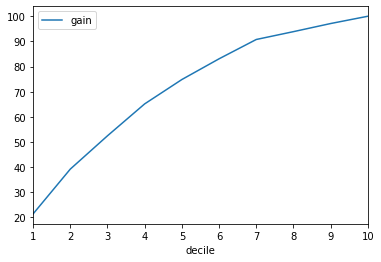

In [220]:
lift_df_final.plot.line(x='decile', y=['gain'])

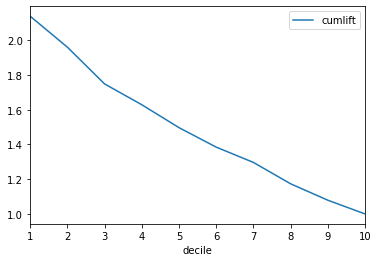

In [221]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

In [3]:
## Total number of rejected customers by bank : 1425
# Customer should be given Credit card based on credit score
# No : 1419
# Yes : 6
# Credit Score Cut off : 338.18

# Revenue Loss for bank #
# Let us assume bank makes Rs.5000 per year from 1 credit card customer.
# Bank refused 6 potential credit card customer,amounting to Rs.30,000 annual loss to the bank. 

(1419/1425)
# 99% of the rejected records would default which meets our expectation.

0.9957894736842106

In [6]:
###############################################################
# Financial benefit of the model
###############################################################

# Financial Benefit of a model will be in terms of either
# a. decreasing the rejection the non-defaulters
# b. increasing the rejection of defaulters


#### Net Profit when no model is considered

#(Considering an average loss of Rs.5000 when each non defaulters application is rejected)
#and an average loss of Rs.1,00,000 when each accepted applicant defaults
Profit_without_model=(66853*5000)-(2946*100000)
print(Profit_without_model)
#39665000

39665000


In [8]:
# Profit with model on the dataset without records with no performance tag using confusion matrix
Profit_with_model=(45873*5000)+(1635*100000)-(20980*5000)-(1311*100000)
# 156865000

In [10]:
#Net financial gain due to using our model
Net_financial_gain=Profit_with_model-Profit_without_model
# Rs.117200000

In [11]:
Percentage_financial_gain=Net_financial_gain*100/Profit_without_model
# 295.4746% financial gain

In [12]:
#--------------------------------------------------------------------------------#
# Conclusions
#--------------------------------------------------------------------------------#

#1. Logistic regression model performs better than other models hence Logistic regression model is considered as final model.
    #Final Cutoff = 0.46
    #sensitivity ~70%
    #specificity ~70%
    #Accuracy ~70% 

#2. Significant variables:
    #Age 
    #Income
    #No.of.months.in.current.residence 
    #No.of.months.in.current.company 
    #woe.Profession.binned
    #woe.Education.binned 
    #No.of.times.60.DPD.or.worse.in.last.6.months
    #No.of.times.30.DPD.or.worse.in.last.6.months
    #No.of.times.90.DPD.or.worse.in.last.12.months
    #No.of.times.60.DPD.or.worse.in.last.12.months 
    #No.of.times.30.DPD.or.worse.in.last.12.months
    #Avgas.CC.Utilization.in.last.12.months
    #No.of.trades.opened.in.last.6.months
    #No.of.PL.trades.opened.in.last.6.months
    #No.of.PL.trades.opened.in.last.12.months

#3 Application scorecard is built on logistic regression model.
    # Cutoff score = 338.18

#4 Financial assesment
    #Net_financial_gain = #Rs.117200000
    #Percentage_financial_gain = #295.4746%
    #Revenue_loss = 31.38% of the non defaulting records are rejected which resulted in revenue loss.

### END ####